## Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,  FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

## Importing Dataset

In [2]:
df = pd.read_csv("medical_insurance.csv")

## Analizing Dataset

In [3]:
df.head(10)

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
5,76435,63,Female,North,Rural,305000.0,HS,Single,Employed,3,...,0,0,0,0,0,0,0,1,1,0
6,84005,36,Male,West,Rural,38900.0,Masters,Single,Employed,1,...,0,0,0,1,0,1,0,1,0,0
7,80918,21,Female,South,Suburban,83700.0,HS,Single,Employed,3,...,0,0,0,2,1,0,0,1,0,1
8,60768,53,Male,North,Suburban,60700.0,No HS,Divorced,Retired,1,...,0,0,0,0,0,1,0,1,1,0
9,50075,28,Male,South,Urban,23600.0,Bachelors,Married,Employed,4,...,0,0,0,0,0,2,0,0,0,0


In [4]:
print("Shape:", df.shape)

Shape: (100000, 54)


In [5]:
print("Columns:\n",df.columns.tolist())

Columns:
 ['person_id', 'age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']


In [6]:
print("\nData types:\n")
print(df.dtypes)


Data types:

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay      

In [7]:
print("\nCount of different data types:\n")
print(df.dtypes.value_counts())


Count of different data types:

int64      31
float64    13
object     10
Name: count, dtype: int64


## Finding Missing Values

In [8]:
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Missing values:
 alcohol_freq                   30083
cardiovascular_disease             0
annual_medical_cost                0
annual_premium                     0
monthly_premium                    0
claims_count                       0
avg_claim_amount                   0
total_claims_paid                  0
chronic_count                      0
hypertension                       0
diabetes                           0
asthma                             0
copd                               0
person_id                          0
provider_quality                   0
cancer_history                     0
kidney_disease                     0
liver_disease                      0
arthritis                          0
mental_health                      0
proc_imaging_count                 0
proc_surgery_count                 0
proc_physio_count                  0
proc_consult_count                 0
proc_lab_count                     0
is_high_risk                       0
risk_score          

In [9]:
df["alcohol_freq" ]

0               NaN
1            Weekly
2               NaN
3               NaN
4             Daily
            ...    
99995    Occasional
99996    Occasional
99997        Weekly
99998    Occasional
99999           NaN
Name: alcohol_freq, Length: 100000, dtype: object

## Misinterpreated as NAN

    The original dataset used 'None' to indicate that the person does not drink alcohol.
    When loaded into pandas, 'None' values are automatically converted to NaN (missing values).
    However, in this case, 'None' is not truly missing data — it represents 'Non-drinker'.
    Therefore, we replace NaN with 'Non-drinker' to preserve the correct meaning.

## Dropping Columns

In [10]:
df = df.drop(columns=['person_id'])

## Imputation

In [11]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Non-drinker')

In [12]:
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Missing values:
 age                            0
provider_quality               0
annual_medical_cost            0
annual_premium                 0
monthly_premium                0
claims_count                   0
avg_claim_amount               0
total_claims_paid              0
chronic_count                  0
hypertension                   0
diabetes                       0
asthma                         0
copd                           0
cardiovascular_disease         0
cancer_history                 0
kidney_disease                 0
liver_disease                  0
arthritis                      0
mental_health                  0
proc_imaging_count             0
proc_surgery_count             0
proc_physio_count              0
proc_consult_count             0
proc_lab_count                 0
is_high_risk                   0
risk_score                     0
policy_changes_last_2yrs       0
sex                            0
policy_term_years              0
region                   

In [13]:
df["alcohol_freq"]

0        Non-drinker
1             Weekly
2        Non-drinker
3        Non-drinker
4              Daily
            ...     
99995     Occasional
99996     Occasional
99997         Weekly
99998     Occasional
99999    Non-drinker
Name: alcohol_freq, Length: 100000, dtype: object

In [14]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical columns:\n", num_cols)
print("\nCategorical columns:\n", cat_cols)


Numerical columns:
 ['age', 'income', 'household_size', 'dependents', 'bmi', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']

Categorical columns:
 ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']


## Data Vizualization

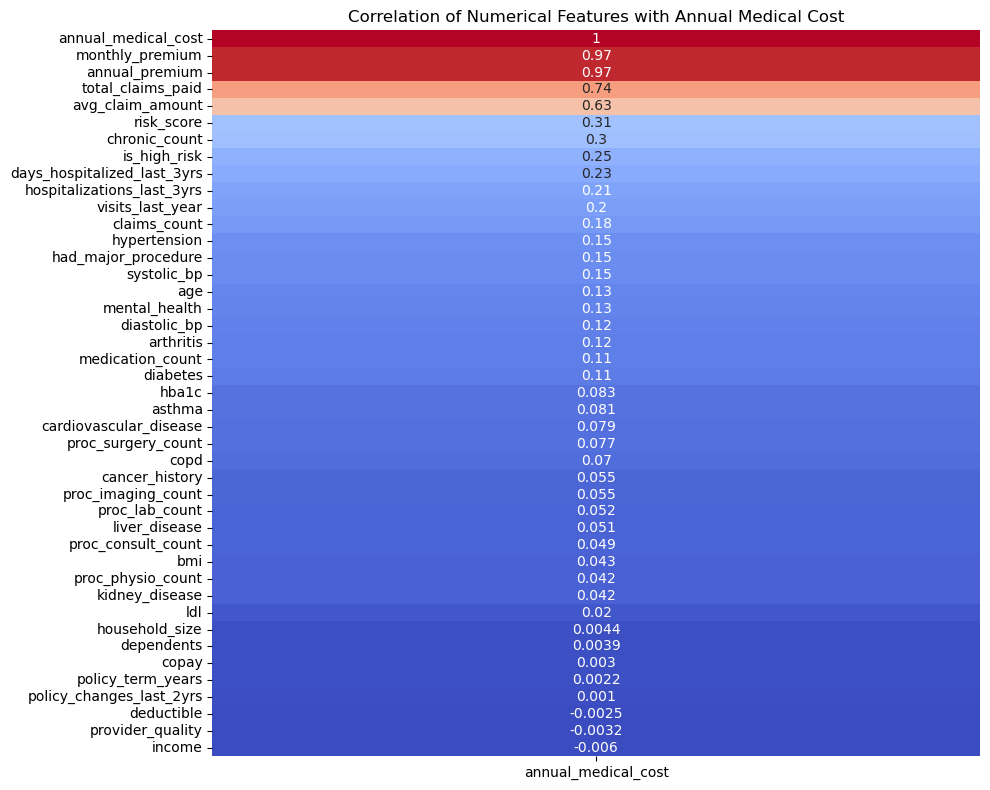

In [15]:
target = 'annual_medical_cost'

# --- Correlation Heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True)[[target]].sort_values(by=target, ascending=False),
            annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation of Numerical Features with Annual Medical Cost")
plt.tight_layout()
plt.show()

<Axes: >

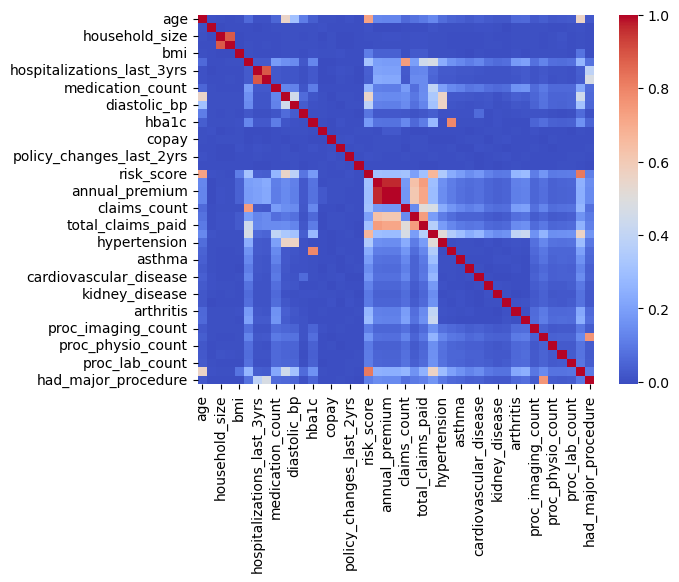

In [16]:
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm')

    Most numerical features show weak correlations, indicating minimal multicollinearity and diverse information across variables.
    Moderate correlations are observed among cost-related features like claims_count, total_claims_paid, and annual_premium, suggesting their interdependence.

## Lets go with pipeline for the remaining steps.

In [17]:
all_cols = num_cols + cat_cols
df_all = df[all_cols]

In [18]:
df = df_all.copy()

In [19]:
X = df.drop("annual_medical_cost", axis=1)
y = df["annual_medical_cost"]

# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Function to apply label encoding
def label_encode_df(X_cat):
    X_encoded = X_cat.copy()
    for col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
    return X_encoded

label_encoder_transformer = FunctionTransformer(label_encode_df)

# Create preprocessing pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('label_encode', label_encoder_transformer)
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # scale everything together after encoding
    ('model', RandomForestRegressor(random_state=42))
])

In [20]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'income', 'household_size', 'dependents', 'bmi',
       'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay',
       'policy_term_y...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('label_encode',
                                                                   FunctionTransformer(func=<function label_encode_df at 0x00000259CC7E7CE0>))]),
                                                  Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object'))])),
                ('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

Model Performance:
MAE:  7.49
RMSE: 124.19
R²:   0.998
